<a href="https://colab.research.google.com/github/kha199/Machine-Learning/blob/main/Customer_Fraud_Detection_using_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Customer_DF (1).csv")
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [32]:
df.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [33]:
df.shape

(168, 10)

In [34]:
df.isnull().sum()

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [35]:
df.tail()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True
167,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False


In [36]:
x = df[["No_Transactions","No_Orders","No_Payments"]]
x.head()

,No_Transactions,No_Orders,No_Payments
0,2,2,1
1,3,3,7
2,5,3,2
3,3,3,1
4,7,7,6


In [37]:
y = df[["Fraud"]]
y.head()

,Fraud
0,False
1,True
2,False
3,False
4,True


In [42]:
x.dtypes

No_Transactions    int64
No_Orders          int64
No_Payments        int64
dtype: object

**TRAIN TEST**

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [45]:
x_train.shape

(134, 3)

In [46]:
y_train.shape

(134, 1)

In [48]:
print(x_test.shape)
print(y_test.shape)

(34, 3)
(34, 1)


**MODEL**

In [67]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.01, solver='lbfgs').fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
y_hat=clf.predict(x_test)
y_hat

array([ True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [53]:
clf.predict([[2,2,1]])

array([False])

In [73]:
yhat = clf.predict_proba(x_test)
yhat

array([[0.1286399 , 0.8713601 ],
       [0.50830104, 0.49169896],
       [0.55666624, 0.44333376],
       [0.58729169, 0.41270831],
       [0.68823357, 0.31176643],
       [0.59994266, 0.40005734],
       [0.58592946, 0.41407054],
       [0.73926448, 0.26073552],
       [0.39936542, 0.60063458],
       [0.46257176, 0.53742824],
       [0.71328536, 0.28671464],
       [0.67317399, 0.32682601],
       [0.61592815, 0.38407185],
       [0.67440869, 0.32559131],
       [0.61725616, 0.38274384],
       [0.660772  , 0.339228  ],
       [0.6303591 , 0.3696409 ],
       [0.55389183, 0.44610817],
       [0.54089899, 0.45910101],
       [0.5395037 , 0.4604963 ],
       [0.77398785, 0.22601215],
       [0.58592946, 0.41407054],
       [0.61459841, 0.38540159],
       [0.77398785, 0.22601215],
       [0.68823357, 0.31176643],
       [0.71443281, 0.28556719],
       [0.65824912, 0.34175088],
       [0.58592946, 0.41407054],
       [0.73926448, 0.26073552],
       [0.660772  , 0.339228  ],
       [0.

**EVALUATION**

**ACCURACY SCORE**

In [57]:
from sklearn import metrics

print("Logistic Regression Accuracy: %.2f"% metrics.accuracy_score(y_hat,y_test))

Logistic Regression Accuracy: 0.76


**CONFUSION METRICS**

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_hat)
cm

array([[23,  1],
       [ 7,  3]])

Text(0.5, 42.0, 'Predicted Values')

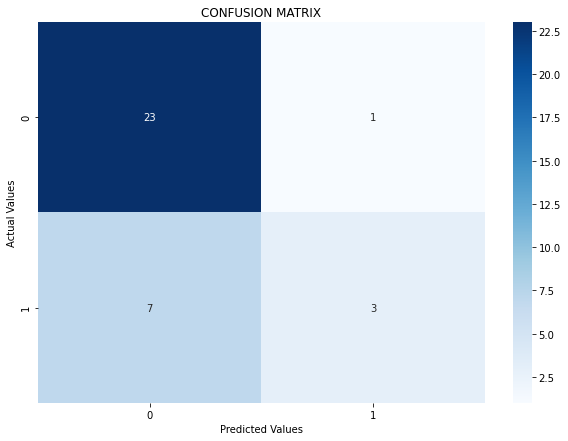

In [70]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

**JACCARD INDEX**

In [78]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test,y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7647058823529411

**CLASSIFICATION REPORT**

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

       False       0.77      0.96      0.85        24
        True       0.75      0.30      0.43        10

    accuracy                           0.76        34
   macro avg       0.76      0.63      0.64        34
weighted avg       0.76      0.76      0.73        34



**LOG LOSS**

In [80]:
from sklearn.metrics import log_loss
print(log_loss(y_test,yhat))

0.5724775734409036
